In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
import pandas as pd

In [153]:
#1

$$\ddot{x}=-\frac{x}{(x^2 + y^2)^{3/2}}$$ \
$$\ddot{y}=-\frac{y}{(x^2 + y^2)^{3/2}}$$ \
Tomando $v_x = \frac{dx}{dt}$ y $v_y = \frac{dy}{dt}$ obtenemos\
$$\begin{bmatrix}
 \frac{dx}{dt}\\ \frac{dy}{dt} \\\frac{dv_x}{dt}\\\frac{dv_y}{dt}
\end{bmatrix}
=\begin{bmatrix}
 v_x \\ v_y \\ -\frac{x}{(x^2 + y^2)^{3/2}} \\-\frac{y}{(x^2 + y^2)^{3/2}}  
\end{bmatrix} $$ \
Tomando $x=U_0$, $y=U_1$, $v_x=U_2$ y $v_y=U_3$ obtenemos \
$$\begin{bmatrix}
 \frac{dU_0}{dt}\\ \frac{dU_1}{dt} \\\frac{dU_2}{dt}\\\frac{dU_3}{dt}
\end{bmatrix}
=\begin{bmatrix}
 U_2 \\ U_3 \\ -\frac{U_0}{(U_0^2 + U_1^2)^{3/2}} \\-\frac{U_1}{(U_0^2 + U_1^2)^{3/2}}  
\end{bmatrix} $$ \

In [134]:
def func2(U, t):#ED en forma vectorial
    du0dt=U[2]
    du1dt=U[3]
    du2dt=-(U[0])/(U[0]**2 + U[1]**2)**(3/2)
    du3dt=-(U[1])/(U[0]**2 + U[1]**2)**(3/2)
    return np.array([du0dt,du1dt,du2dt,du3dt])


U0=np.array([0.5, 0.0,0.0,1.63]) #Condiciones iniciales
t=np.linspace(0,30,1000) 
sol=odeint(func2,U0,t) # Integrador 
x, y, vx, vy, = sol[:,0], sol[:,1], sol[:,2], sol[:,3] #Soluciones de posición y velocidad

No handles with labels found to put in legend.


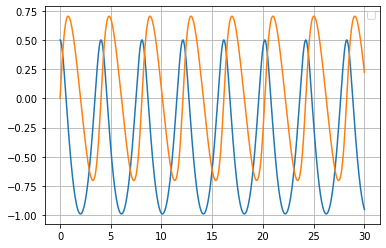

In [140]:
plt.legend()
plt.grid()
plt.plot(t,x,label='x') # x vs t
plt.plot(t,y,label='y') # y vs t

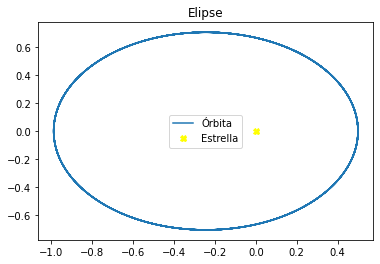

In [139]:
plt.title('Elipse')
plt.plot(x,y, label="Órbita")
plt.plot(0,0, 'X',color='yellow', label="Estrella")
plt.legend()

In [120]:
U01=np.array([1, 0.0,0.0,1]) #Condiciones iniciales para la cual la solución de la ecuación diferencial es una circunferencia: x0=1, y0=0, vx0=0 y vy0=0 
t=np.linspace(0,30,1000) 
sol=odeint(func2,U01,t) # Integrador 
x1, y1, vx1, vy1, = sol[:,0], sol[:,1], sol[:,2], sol[:,3] #Soluciones de posición y velocidad

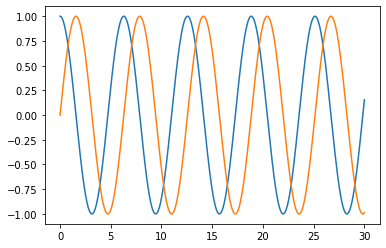

In [121]:
plt.plot(t,x1,label='x') # x vs t
plt.plot(t,y1,label='y') # y vs t

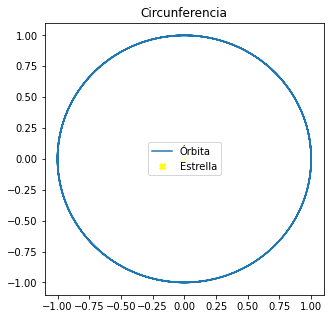

In [129]:
plt.figure(figsize=(5,5))
plt.title('Circunferencia')
plt.plot(x1,y1, label="Órbita")
plt.plot(0,0, 'X',color='yellow', label="Estrella")
plt.legend()

In [11]:
r=np.sqrt(x**2 + y**2) #Posición
vr=np.sqrt(vx**2 + vy**2) #Velocidad
omega=vr/r #Velocidad angular
T=2*np.pi/omega #Periodo
np.mean(T) #Periodo en promedio

4.809938060094282

In [37]:
pd.DataFrame({'Distancia Tierra-Sol':r,'Periodo':T})

,Distancia Tierra-Sol,Periodo
0,0.500000,1.927357
1,0.500592,1.931357
2,0.502358,1.943328
3,0.505275,1.963181
4,0.509302,1.990775
...,...,...
995,0.962942,7.062684
996,0.966767,7.130789
997,0.970291,7.194120
998,0.973513,7.252534


In [13]:
#2

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_Metodos_Computacionales/main/Entregas/Parciales/Parcial2/dataset/Pendulo_simple.csv', sep=";")
df

,Tiempo (ms),Ángulo 1
0,9,"59,0289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,0049247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [39]:
df["Ángulo_Deg"] = df["Ángulo 1"].str.replace(",",".").astype(float)
df

,Tiempo (ms),Ángulo 1,Ángulo_Deg
0,9,"59,0289611816406",59.028961
1,42,"59,9823265075684",59.982327
2,75,"61,2374534606934",61.237453
3,108,"63,0049247741699",63.004925
4,142,"65,3887710571289",65.388771
...,...,...,...
2842,94709,"94,9375762939453",94.937576
2843,94743,"96,479850769043",96.479851
2844,94776,"97,9406890869141",97.940689
2845,94809,"99,3180923461914",99.318092


In [43]:
#del(df['Ángulo 1'])

df #Columna eliminada

,Tiempo (ms),Ángulo_Deg
0,9,59.028961
1,42,59.982327
2,75,61.237453
3,108,63.004925
4,142,65.388771
...,...,...
2842,94709,94.937576
2843,94743,96.479851
2844,94776,97.940689
2845,94809,99.318092


In [44]:
df2=df.assign(Ángulo_Rad=np.deg2rad(df.Ángulo_Deg))
df2

,Tiempo (ms),Ángulo_Deg,Ángulo_Rad
0,9,59.028961,1.030250
1,42,59.982327,1.046889
2,75,61.237453,1.068795
3,108,63.004925,1.099643
4,142,65.388771,1.141249
...,...,...,...
2842,94709,94.937576,1.656973
2843,94743,96.479851,1.683891
2844,94776,97.940689,1.709387
2845,94809,99.318092,1.733428


Text(0, 0.5, 'Ángulo_Deg')

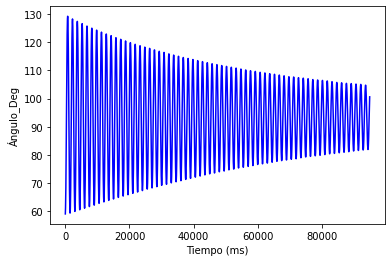

In [144]:
plt.plot(df2['Tiempo (ms)'], df2['Ángulo_Deg'],"b-")
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo_Deg')

#Como conclusión tenemos un movimiento armónico amortiguado cuya amplutud decae con el tiempo

Text(0, 0.5, 'Ángulo_Rad')

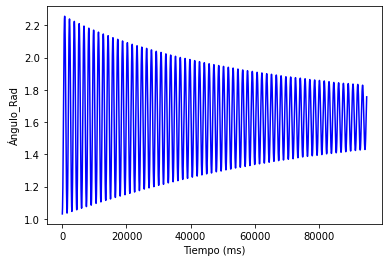

In [146]:
plt.plot(df2['Tiempo (ms)'], df2['Ángulo_Rad'],"b-")
plt.xlabel('Tiempo (ms)')
plt.ylabel('Ángulo_Rad') 
#Gráficas para ángulos en radianes

In [147]:
def x(t,A, b, omega, phi):
 
  return A*np.exp(-b*t)*np.sin(omega*t + phi)

A=np.max(df2['Ángulo_Rad'])
#p0=[A, 1, 1,1]
b, omega, phi = 1, 0, 0

In [148]:
#Vamos a usar los gráfica con ángulos en radianes para calcular los parámetros A, b, omega, phi
from scipy.optimize.minpack import curve_fit
sigmaPosition = np.sqrt(df2['Ángulo_Rad'])
#s,y = curve_fit(x,df2.iloc[:,0], df2.iloc[:,2])

p, c = curve_fit(x,df2.iloc[:,0], df2.iloc[:,2],sigma=1/sigmaPosition, p0=[A, b, omega, phi])
p

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([  2.25639162,   0.99901251, 110.39049575, 993.49056199])

In [149]:
A=p[0]/2 #Amplitud
A

1.1281958100247347

In [150]:
b=p[1] #Fricción
b

0.999012507682178

In [151]:
omega=p[2] #Velocidad angular en rad/s
omega

110.3904957534439

In [152]:
phi=p[3] #Fase inicial
phi

993.4905619948174